## Import libraries

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy import stats

## Load the tickers/ stocks

In [2]:
tickers = pd.read_csv("top_50_indian_stocks.csv")
tickers.head(3)

,Ticker,Company Name
0,RELIANCE.NS,Reliance Industries
1,TCS.NS,Tata Consultancy Services
2,HDFCBANK.NS,HDFC Bank


## Weighted score model 

In [3]:
def fetch_stock_values(tickers_list):

    #Initialize an empty list to collect rows
    rows = []

    for ticker in tickers_list:
        ticker_name = ticker
        ticker = yf.Ticker(ticker)
        info = ticker.info
        dividend_yield = info.get("dividendYield", np.nan) * 100 if info.get("dividendYield") else np.nan
        dividend_rate = info.get("dividendRate", np.nan) 
        payout_ratio = info.get("payoutRatio", np.nan) * 100 if info.get("payoutRatio") else np.nan
        five_year_avg_dividend_yield = info.get("fiveYearAvgDividendYield", np.nan) * 100 if info.get("fiveYearAvgDividendYield") else np.nan
        earning_growth = info.get("earningsGrowth", np.nan) * 100 if info.get("earningsGrowth") else np.nan

        #Append the data as list to the rows
        rows.append([ticker_name, dividend_yield, dividend_rate, payout_ratio, five_year_avg_dividend_yield, earning_growth])


    #Define the new columns
    new_cols = [
        "Ticker", 
        "Dividend Yield(%)", 
        "Dividend Rate",
        "Payout Ratio(%)", 
        "5 Year Avg Dividend Yield(%)", 
        "Earning Growth(%)"
    ]

    #Convert the list of rows and columns to dataframe
    new_df = pd.DataFrame(rows, columns=new_cols)

    #Get normalised values for each column
    normalised_cols = [
         "Dividend Yield(%)", 
        "Dividend Rate",
        "Payout Ratio(%)", 
        "5 Year Avg Dividend Yield(%)", 
        "Earning Growth(%)"
    ]

    for col in normalised_cols:
        if col == 'Payout Ratio':
            new_df[col + "Normalised"] = 1 - (new_df[col] - new_df[col].min()) / (new_df[col].max() - new_df[col].min())
        else:
            new_df[col + "Normalised"] = (new_df[col] - new_df[col].min()) / (new_df[col].max() - new_df[col].min())

    return new_df
    

In [4]:
tickers_list = tickers['Ticker'].values.tolist()
df = fetch_stock_values(tickers_list)
df.head()

,Ticker,Dividend Yield(%),Dividend Rate,Payout Ratio(%),5 Year Avg Dividend Yield(%),Earning Growth(%),Dividend Yield(%)Normalised,Dividend RateNormalised,Payout Ratio(%)Normalised,5 Year Avg Dividend Yield(%)Normalised,Earning Growth(%)Normalised
0,RELIANCE.NS,35.0,5.0,9.779999,44.0,2.4,0.028195,0.029851,0.066549,0.042553,0.038127
1,TCS.NS,174.0,60.0,43.220000,129.0,-1.7,0.158835,0.440299,0.323227,0.137738,0.034822
2,HDFCBANK.NS,115.0,22.0,21.110001,67.0,6.0,0.103383,0.156716,0.153516,0.068309,0.041029
3,INFY.NS,393.0,63.0,64.440000,214.0,-12.7,0.364662,0.462687,0.486107,0.232923,0.025955
4,ICICIBANK.NS,71.0,10.0,14.060001,99.0,16.1,0.062030,0.067164,0.099401,0.104143,0.049170


In [5]:
#Assign weights 
weights = {
        "Dividend Yield(%)Normalised": 0.3,
        "Dividend RateNormalised": 0.2,
        "Payout Ratio(%)Normalised": 0.2,
        "5 Year Avg Dividend Yield(%)Normalised": 0.2,
        "Earning Growth(%)Normalised": 0.1
}

df["Dividend Score"] = df[[col for col in weights.keys()]].mul(list(weights.values())).sum(axis=1)
df

,Ticker,Dividend Yield(%),Dividend Rate,Payout Ratio(%),5 Year Avg Dividend Yield(%),Earning Growth(%),Dividend Yield(%)Normalised,Dividend RateNormalised,Payout Ratio(%)Normalised,5 Year Avg Dividend Yield(%)Normalised,Earning Growth(%)Normalised,Dividend Score
0,RELIANCE.NS,35.0,5.0,9.779999,44.0,2.4,0.028195,0.029851,0.066549,0.042553,0.038127,0.040062
1,TCS.NS,174.0,60.0,43.220000,129.0,-1.7,0.158835,0.440299,0.323227,0.137738,0.034822,0.231385
2,HDFCBANK.NS,115.0,22.0,21.110001,67.0,6.0,0.103383,0.156716,0.153516,0.068309,0.041029,0.110826
3,INFY.NS,393.0,63.0,64.440000,214.0,-12.7,0.364662,0.462687,0.486107,0.232923,0.025955,0.348337
4,ICICIBANK.NS,71.0,10.0,14.060001,99.0,16.1,0.062030,0.067164,0.099401,0.104143,0.049170,0.077668
5,HINDUNILVR.NS,207.0,48.0,94.879997,151.0,-3.8,0.189850,0.350746,0.719757,0.162374,0.033129,0.306843
6,SBIN.NS,201.0,15.9,15.760000,139.0,-8.3,0.184211,0.111194,0.112450,0.148936,0.029502,0.132729
7,BAJFINANCE.NS,47.0,4.4,13.420000,24.0,17.0,0.039474,0.025373,0.094489,0.020157,0.049895,0.044835
8,BHARTIARTL.NS,43.0,8.0,14.280000,80.0,423.0,0.035714,0.052239,0.101090,0.082867,0.377156,0.095669
9,ITC.NS,379.0,15.7,88.830000,408.0,284.3,0.351504,0.109701,0.673319,0.450168,0.265355,0.378624


## Sort by Dividend score and pick top 10 stocks

In [14]:
df = df.sort_values(by='Dividend Score', ascending=False)
if 'index' in df.columns:
    df = df.drop(columns=['index'])
df = df.reset_index(drop=True)
df.head(10)

,Ticker,Dividend Yield(%),Dividend Rate,Payout Ratio(%),5 Year Avg Dividend Yield(%),Earning Growth(%),Dividend Yield(%)Normalised,Dividend RateNormalised,Payout Ratio(%)Normalised,5 Year Avg Dividend Yield(%)Normalised,Earning Growth(%)Normalised,Dividend Score
0,IOC.NS,1069.0,15.0,70.919997,730.0,57.8,1.000000,0.104478,0.535846,0.810750,0.082783,0.598493
1,COALINDIA.NS,808.0,31.6,45.930000,899.0,-29.2,0.754699,0.228358,0.344028,1.000000,0.012655,0.542153
2,HEROMOTOCO.NS,300.0,130.0,64.019996,317.0,24.2,0.277256,0.962687,0.482883,0.348264,0.055699,0.447513
3,HCLTECH.NS,425.0,72.0,84.260005,305.0,1.6,0.394737,0.529851,0.638241,0.334826,0.037482,0.422753
4,ONGC.NS,696.0,17.5,46.880000,522.0,-33.4,0.649436,0.123134,0.351320,0.577828,0.009270,0.406214
5,POWERGRID.NS,525.0,15.0,64.050000,509.0,-0.4,0.488722,0.104478,0.483113,0.563270,0.035870,0.380376
6,ITC.NS,379.0,15.7,88.830000,408.0,284.3,0.351504,0.109701,0.673319,0.450168,0.265355,0.378624
7,BPCL.NS,496.0,15.5,49.660000,565.0,-8.4,0.461466,0.108209,0.372659,0.625980,0.029421,0.362752
8,INFY.NS,393.0,63.0,64.440000,214.0,-12.7,0.364662,0.462687,0.486107,0.232923,0.025955,0.348337
9,TATASTEEL.NS,237.0,3.6,131.390000,281.0,113.6,0.218045,0.019403,1.000000,0.307951,0.127761,0.343660


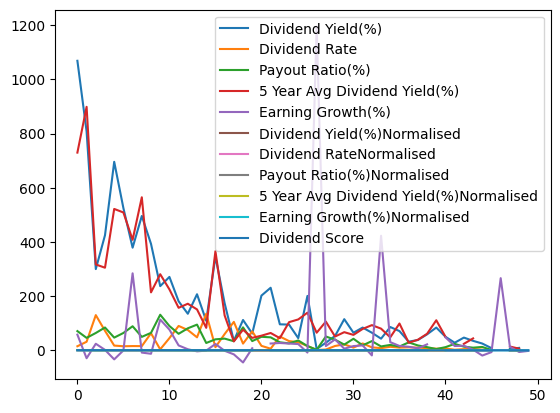

In [22]:
import matplotlib

axs = df.plot()
